### Experience

In [1]:
from os import path

import sys
import matplotlib.pyplot as plt

sys.path.append(path.abspath('/mnt/B6C8BAECC8BAAA4F/André/UC/Tese/MScThesis/Graphy'))

import graphy

from graphy.utils import time as my_time
from graphy.db import opentsdb

In [2]:
#from graphy.utils import zipkin

#service_names = zipkin.get_services()

service_names = ['nova-api-cascading']

service_names

['nova-api-cascading']

In [3]:
def add_datetime_column(data_frame):
    data_frame['datetime'] = pd.to_datetime(data_frame['time'], unit='s')
    return data_frame

In [4]:

metric_names = list()

for service_name in service_names:
    metric_name_1 = 'huawei.call_count_in.{}'.format(service_name)
    metric_name_2 = 'huawei.call_count_out.{}'.format(service_name)
    metric_name_3 = 'huawei.response_time_avg.{}'.format(service_name)
    metric_names.append((metric_name_1, metric_name_2, metric_name_3))

metric_names

[('huawei.call_count_in.nova-api-cascading',
  'huawei.call_count_out.nova-api-cascading',
  'huawei.response_time_avg.nova-api-cascading')]

In [5]:
import pandas as pd

data_frames_dict = dict()

def retrieve_metrics(metric_names, start_timestamp, end_timestamp):
    for metric_name in metric_names:
        metrics_0 = opentsdb.get_metrics(metric_name[0], start_timestamp, end_timestamp)
        metrics_1 = opentsdb.get_metrics(metric_name[1], start_timestamp, end_timestamp)
        metrics_2 = opentsdb.get_metrics(metric_name[2], start_timestamp, end_timestamp)

        service_name = metric_name[0].split('.')[-1]

        try:
            df_0 = pd.DataFrame(metrics_0.items(), columns=['time', 'call_count_in'])
            df_1 = pd.DataFrame(metrics_1.items(), columns=['time', 'call_count_out'])
            df_2 = pd.DataFrame(metrics_2.items(), columns=['time', 'response_time_avg'])

            df = None
            df = pd.merge(df_0, df_1, how='outer')
            df = pd.merge(df, df_2, how='outer')

            data_frames_dict[service_name] = df.copy()
        except Exception as ex:
            metrics_lack = list()
            if metrics_0 is None:
                metrics_lack.append('call_count_in')
            if metrics_1 is None:
                metrics_lack.append('call_count_out')
            if metrics_2 is None:
                metrics_lack.append('response_time_avg')
            print('{} lacks information in {}'.format(service_name, metrics_lack))

start_timestamp = 1530212400 # (28.06) 19:00:00
end_timestamp = 1530219600   # (28.06) 21:00:00
            
retrieve_metrics(metric_names, start_timestamp, end_timestamp)

anomalous_data_frame_1 = data_frames_dict['nova-api-cascading']
anomalous_data_frame_1 = add_datetime_column(anomalous_data_frame_1)

start_timestamp = 1530223200 # (28.06) 22:00:00
end_timestamp = 1530230400   # (28.06) 00:00:00
            
retrieve_metrics(metric_names, start_timestamp, end_timestamp)
            
anomalous_data_frame_2 = data_frames_dict['nova-api-cascading']
anomalous_data_frame_2 = add_datetime_column(anomalous_data_frame_2)

In [6]:
print('Sorted by call_count_in', anomalous_data_frame_1.sort_values(by='call_count_in'))
print('Sorted by call_count_out', anomalous_data_frame_1.sort_values(by='call_count_out'))
print('Sorted by response_time_avg', anomalous_data_frame_1.sort_values(by='response_time_avg'))

Sorted by call_count_in            time  call_count_in  call_count_out  response_time_avg  \
32   1530214515              3               3       1.779227e+06   
90   1530218475             10               8       3.618380e+05   
80   1530217785             12               8       1.591110e+05   
79   1530217770             12               8       1.591110e+05   
48   1530215535             12               8       2.472310e+05   
5    1530212850             16              13       2.577108e+05   
6    1530212865             16              13       2.577108e+05   
25   1530213825             16              12       1.974132e+05   
56   1530215895             18              12       1.916048e+05   
57   1530215910             18              12       1.916048e+05   
96   1530218835             20              15       1.322866e+05   
63   1530216675             22              16       8.883507e+05   
70   1530217065             24              16       1.472630e+05   
69   15302

In [7]:
print('Sorted by call_count_in', anomalous_data_frame_2.sort_values(by='call_count_in'))
print('Sorted by call_count_out', anomalous_data_frame_2.sort_values(by='call_count_out'))
print('Sorted by response_time_avg', anomalous_data_frame_2.sort_values(by='response_time_avg'))

Sorted by call_count_in           time  call_count_in  call_count_out  response_time_avg  \
33  1530225870              9               6      200324.671875   
32  1530225855              9               6      200324.671875   
45  1530226605             15              10      183360.203125   
18  1530224985             23              17      150249.406250   
17  1530224970             23              17      150249.406250   
83  1530229050             24              16      154297.750000   
82  1530229035             24              16      154297.750000   
25  1530225405             26              18      168214.375000   
24  1530225390             26              18      168214.375000   
77  1530228645             27              18      127989.781250   
66  1530228195             30              20      165632.406250   
94  1530229770             32              24      188030.250000   
93  1530229755             32              24      188030.250000   
50  1530227235          

#### Sort data frames

In [8]:
# Anomalous data frames
anomalous_data_frame_1_sorted = anomalous_data_frame_1.sort_values(by='response_time_avg')

# Non-Anomalous data frames
non_anomalous_data_frame_1_sorted = anomalous_data_frame_2.sort_values(by='response_time_avg')

#### Plot "Anomalous" region

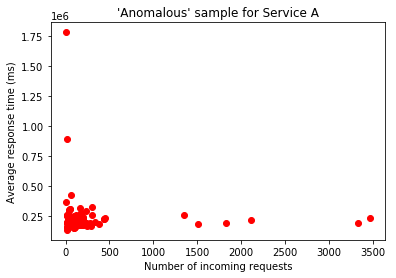

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.gcf()

plt.plot(anomalous_data_frame_1_sorted['call_count_in'].to_list(), anomalous_data_frame_1_sorted['response_time_avg'].to_list(), 'ro')
plt.title('\'Anomalous\' sample for Service A')
plt.xlabel('Number of incoming requests')
plt.ylabel('Average response time (ms)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
plt.draw()
    
fig.savefig('anomalous_sample_service_a_1' + '.svg', format="svg")

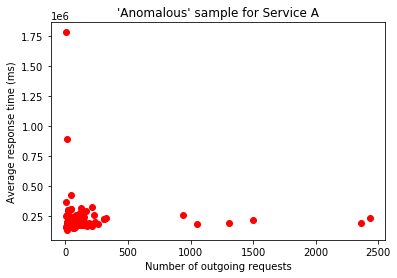

<Figure size 432x288 with 0 Axes>

In [10]:
fig = plt.gcf()

plt.plot(anomalous_data_frame_1_sorted['call_count_out'].to_list(), anomalous_data_frame_1_sorted['response_time_avg'].to_list(), 'ro')
plt.title('\'Anomalous\' sample for Service A')
plt.xlabel('Number of outgoing requests')
plt.ylabel('Average response time (ms)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
plt.draw()
    
fig.savefig('anomalous_sample_service_a_2' + '.svg', format="svg")

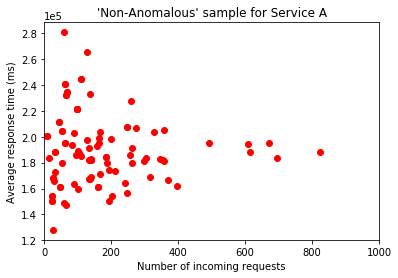

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.gcf()

plt.plot(non_anomalous_data_frame_1_sorted['call_count_in'].to_list(), non_anomalous_data_frame_1_sorted['response_time_avg'].to_list(), 'ro')
plt.title('\'Non-Anomalous\' sample for Service A')
plt.xlabel('Number of incoming requests')
plt.ylabel('Average response time (ms)')
plt.xlim(left=0, right=1000)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
plt.draw()
    
fig.savefig('anomalous_sample_service_a_3' + '.svg', format="svg")

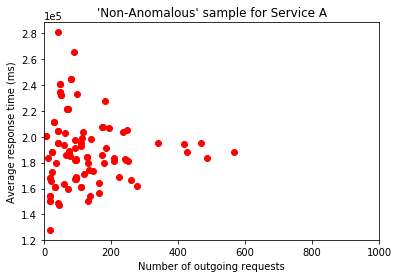

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.gcf()

plt.plot(non_anomalous_data_frame_1_sorted['call_count_out'].to_list(), non_anomalous_data_frame_1_sorted['response_time_avg'].to_list(), 'ro')
plt.title('\'Non-Anomalous\' sample for Service A')
plt.xlabel('Number of outgoing requests')
plt.ylabel('Average response time (ms)')
plt.xlim(left=0, right=1000)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.show()
plt.draw()
    
fig.savefig('anomalous_sample_service_a_4' + '.svg', format="svg")